In [1]:
from keras.datasets import boston_housing

2024-06-09 16:05:54.778993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 16:05:55.310313: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-09 16:05:55.310387: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-09 16:05:55.384337: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-09 16:05:56.585977: W tensorflow/stream_executor/platform/de

In [2]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

In [3]:
import numpy as np

In [4]:
mean = train_data.mean(axis = 0)

In [5]:
train_data -= mean

In [6]:
std = train_data.std(axis = 0)

In [7]:
train_data /= std

In [8]:
from keras import models, layers

In [15]:
def build_model():
    network = models.Sequential()
    network.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[-1], )))
    network.add(layers.Dense(64, activation = 'relu'))
    network.add(layers.Dense(1))
    network.compile(
        optimizer = 'rmsprop',
        loss = 'mse',
        metrics = ['mae']
    )
    return network

In [25]:
network = build_model()

In [26]:
hist = network.fit(train_data, train_target, batch_size = 64, epochs = 40, validation_split = 0.2)

Epoch 1/40
6/6 [==============================] - 0s 24ms/step - loss: 554.5720 - mae: 21.6354 - val_loss: 598.4470 - val_mae: 22.6315
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 511.6594 - mae: 20.6246 - val_loss: 561.4786 - val_mae: 21.7823
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 475.2423 - mae: 19.7223 - val_loss: 515.7695 - val_mae: 20.7179
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 432.2759 - mae: 18.6453 - val_loss: 473.0943 - val_mae: 19.7299
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 391.3235 - mae: 17.5978 - val_loss: 425.7860 - val_mae: 18.5832
Epoch 6/40
6/6 [==============================] - 0s 6ms/step - loss: 346.1543 - mae: 16.3998 - val_loss: 383.0145 - val_mae: 17.5048
Epoch 7/40
6/6 [==============================] - 0s 6ms/step - loss: 306.2930 - mae: 15.2956 - val_loss: 332.9604 - val_mae: 16.1153
Epoch 8/40
6/6 [==============================] - 0s 7ms/step

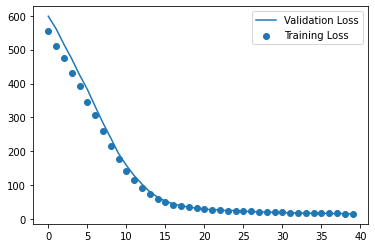

In [27]:
hist = hist.history
import matplotlib.pyplot as plt
plt.plot(range(len(hist['val_loss'])), hist['val_loss'], label = 'Validation Loss')
plt.scatter(range(len(hist['loss'])), hist['loss'], label = 'Training Loss')
plt.legend()
plt.show()